In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df1 = pd.read_csv("../data/SanFranciscoBay_toHenk.txt", sep=" ", header=None, names = ["time","Q","L"])

In [3]:
n = len(df1.time)
print(n)

8766


In [4]:
print(df1)

          time           Q      L
0     729299.0  503.700067  82.62
1     729300.0  496.620856  82.84
2     729301.0  500.273729  83.02
3     729302.0  490.079664  83.22
4     729303.0  496.677489  83.30
...        ...         ...    ...
8761  738060.0  324.001359  87.83
8762  738061.0  324.539379  87.89
8763  738062.0  324.312844  87.94
8764  738063.0  316.950464  88.20
8765  738064.0  320.263535  88.45

[8766 rows x 3 columns]


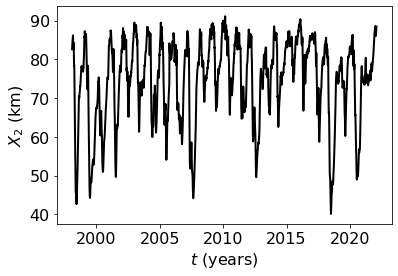

In [5]:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df1.time/365,df1.L,lw=2,color='black')
plt.xlabel(r'$t$ (years)',fontsize=16); 
plt.ylabel(r'$X_2$ (km)',fontsize=16,rotation=90)
plt.savefig('../paper/figs/L_data_SFB.png',bbox_inches='tight')
plt.show()

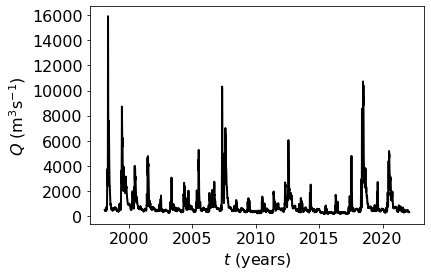

In [6]:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df1.time/365,df1.Q,lw=2,color='black')
plt.xlabel(r'$t$ (years)',fontsize=16); 
plt.ylabel(r'$Q$ (m$^3$s$^{-1}$)',fontsize=16,rotation=90)
plt.savefig('../paper/figs/Q_data_SFB.png',bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

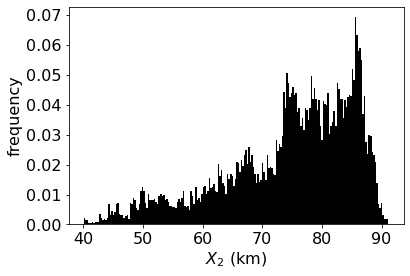

In [7]:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(df1.L,bins = 200, density=True,color='black') 
plt.xlabel(r'$X_2$ (km)',fontsize=16)
plt.ylabel(r'frequency',fontsize=16,rotation=90)
plt.savefig('../paper/figs/L_pdf_SFB.png',bbox_inches='tight')
plt.show

In [8]:
import scipy
from scipy.stats import skew, kurtosis

Xem = df1.L
print(np.mean(Xem))
print(np.sqrt(np.var(Xem)))
print(skew(Xem, axis=0, bias=True))
print(kurtosis(Xem, axis=0, bias=True))

74.57776637006616
10.915788561146227
-0.9056133615783161
0.12384769442699639


<function matplotlib.pyplot.show(close=None, block=None)>

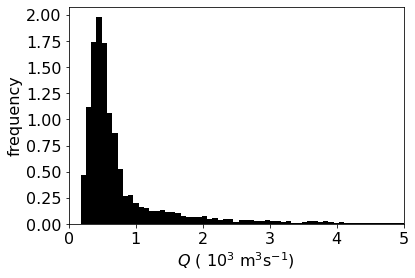

In [9]:
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(df1.Q/1000,bins = 200, density=True,color='black') 
plt.xlim(0,5)
plt.xlabel(r'$Q$ ( 10$^3$ m$^3$s$^{-1}$)',fontsize=16)
plt.ylabel(r'frequency',fontsize=16,rotation=90)
plt.savefig('../paper/figs/Q_pdf_SFB.png',bbox_inches='tight')
plt.show

In [10]:
import scipy
from scipy.stats import skew, kurtosis

Xem = df1.Q
Qmean = np.mean(Xem)
print(np.mean(Xem))
print(np.sqrt(np.var(Xem)))
print(skew(Xem, axis=0, bias=True))
print(kurtosis(Xem, axis=0, bias=True))

893.053468075689
1101.1352240998901
4.6447153707765105
31.88336096899276


Fit of CAM distribution function 

In [11]:
from datetime import date, timedelta
n = len(df1.time)
print(n)
start = date(1,1,1)
times = np.array([])
riverd = np.array([])
for j in range(1,n):
    days = df1.time[j]
    delta = timedelta(days)
    times = np.append(times, start + delta)
    disch = df1.Q[j]
    riverd = np.append(riverd, disch)

print(times[1])
print(times[8764])

8766
1997-10-05
2021-10-02


                 riverd
1997-10-31   450.527097
1997-11-30   531.140036
1997-12-31  2166.319148
1998-01-31  7374.087762
1998-02-28  3779.032854
...                 ...
2021-06-30   400.577663
2021-07-31   428.038367
2021-08-31   404.055824
2021-09-30   359.817450
2021-10-31   318.607000

[289 rows x 1 columns]


<AxesSubplot:>

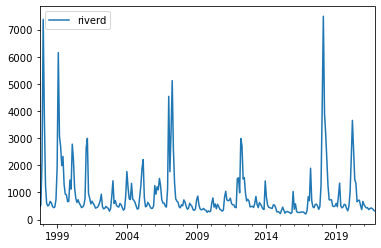

In [12]:
dfseries = pd.DataFrame(index=pd.date_range('1997-10-04', '2021-10-02', freq='d'))
#print(riverd)
dfseries['riverd'] = riverd
#print(dfseries)
resample = dfseries.resample('M')
monthly_mean = resample.mean()
print(monthly_mean)
monthly_mean.plot()

289


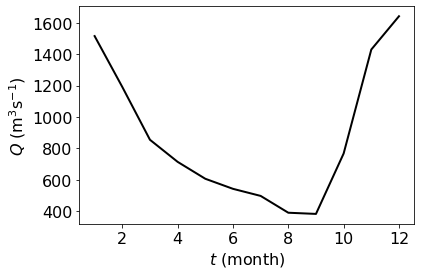

In [13]:
Qmean = 893.0
mdata = np.array([])
lenm = len(monthly_mean.riverd)
print(lenm) 
for j in range(1,lenm):
    dum1 = monthly_mean.riverd[j]
    mdata = np.append(mdata, dum1)
    
smean = np.zeros(13)
tims = np.zeros(13)
mt = 12
ml = 24
for j in range(1,mt+1):
    tims[j] = j
    smean[j] = 0.0
    for i in range(1,ml):
        dum = mdata[j+(i-1)*mt]
        smean[j] = dum + smean[j] 

ss = np.zeros(13) 
for j in range(1,mt+1):
    if j < 10:
        ss[j] = smean[j+3]/ml
    else:
        ss[j] = smean[j-9]/ml
        
#print(smean/ml)
#print(tims,ss)
ssr = np.zeros(13)
ssr = (ss-Qmean)/Qmean
#plt.plot(tims[1:13],ssr[1:13])

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(tims[1:13],ss[1:13],lw=2,color='black')
plt.xlabel(r'$t$ (month)',fontsize=16); 
plt.ylabel(r'$Q$ (m$^3$s$^{-1}$)',fontsize=16,rotation=90)
plt.savefig('../paper/figs/Q_data_SFB_seasonal',bbox_inches='tight')
plt.show()


Fitting of seasonal cycle signal 

In [14]:
def fitfunction(t, a, b):
    #return a*np.sin(2*np.pi*t/12)+b*np.cos(2*np.pi*t/12) + c*np.sin(np.pi*t/12)+d*np.cos(np.pi*t/12) 
    return a*np.sin(2*np.pi*t/12)+b*np.cos(2*np.pi*t/12) + Qmean

[202.92928661 520.238667  ]


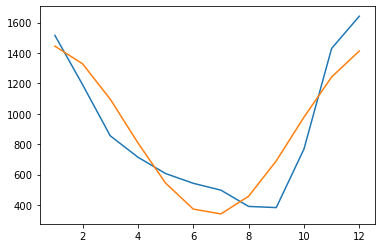

In [15]:
from scipy.optimize import curve_fit
y_arr = ss[1:13]
x_arr = tims[1:13]
pars, cov = curve_fit(f=fitfunction, xdata=x_arr, ydata=y_arr, p0=[0, 0], bounds=(-np.inf, np.inf))
#pars, cov = curve_fit(f=fitfunction, xdata=x_arr, ydata=y_arr, p0=[0, 0,0], bounds=(-np.inf, np.inf))
print(pars)

plt.plot(tims[1:13],ss[1:13])
plt.plot(tims[1:13],fitfunction(tims[1:13],pars[0],pars[1]))
#plt.plot(tims[1:13],fitfunction(tims[1:13],pars[0],pars[1],pars[2]))

<function matplotlib.pyplot.show(close=None, block=None)>

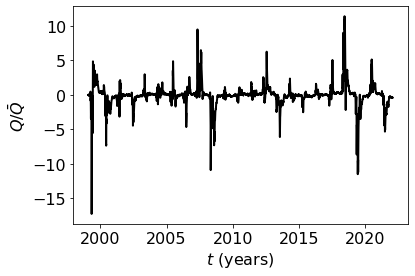

In [16]:
diff = np.array([])
days_in_year = 365
X = dfseries.riverd
#print(X)
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff = np.append(diff, value)
    
#print(diff)
#plt.plot(diff/Qmean)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df1.time[366:len(X)+1]/365,diff/Qmean,lw = 2,color='black') 
plt.xlabel(r'$t$ (years)',fontsize=16)
plt.ylabel(r'$Q/\bar{Q}$',fontsize=16,rotation=90)
plt.savefig('../paper/figs/Q_data_SFB_residual',bbox_inches='tight')
plt.show

Determine autocorrelation of time series

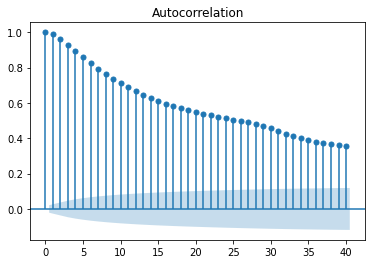

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff/Qmean)

import statsmodels.api as sm

#calculate autocorrelations
adata = sm.tsa.acf(diff/Qmean,nlags = 10, fft = False)

In [18]:
def fitauto(t, a): 
    return np.exp(-t/a)

lags = np.linspace(1,10,num=11)
print(lags)
pars1, cov1 = curve_fit(f=fitauto, xdata=lags, ydata=adata, p0=[0.1], bounds=(-np.inf, np.inf))


tau = pars1*24*3600 
print(pars1,tau)

[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]
[33.04801062] [2855348.11751837]


In [19]:
# Just to look also at the seasonally filtered monthly time series; not used. 
diffm = np.array([])
months_in_year = 12
Xm = monthly_mean.riverd
#print(X)
for i in range(months_in_year, len(Xm)):
    value = Xm[i] - Xm[i - months_in_year]
    diffm = np.append(diffm, value)
    
#print(diff)


<function matplotlib.pyplot.show(close=None, block=None)>

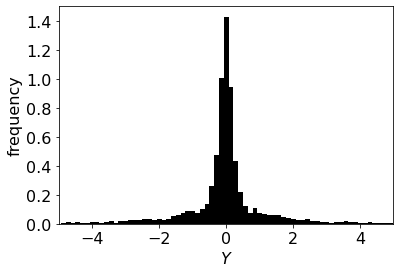

In [21]:
#Plot the histogram of the daily seasonally filtered time series
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(diff/Qmean,bins = 200, density=True,color='black') 
plt.xlim([-5,5])
plt.xlabel(r'$Y$',fontsize=16)
plt.ylabel(r'frequency',fontsize=16,rotation=90)
plt.savefig('../paper/figs/Q_pdf_SFB_residual',bbox_inches='tight')
plt.show

Determine statistical properties of the distribution 

In [22]:
import scipy
from scipy.stats import skew, kurtosis

Xem = diff/Qmean
print(np.mean(Xem))
print(np.sqrt(np.var(Xem)))
print(skew(Xem, axis=0, bias=True))
print(kurtosis(Xem, axis=0, bias=True))

-0.05472804401733689
1.5362330334962795
-0.9601506078356498
19.514583697359615


In [23]:
###### More general case
mu = -1/tau 
M0 = scipy.stats.moment(Xem,moment = 0)
M1 = scipy.stats.moment(Xem,moment = 1)
M2 = scipy.stats.moment(Xem,moment = 2)
M3 = scipy.stats.moment(Xem,moment = 3)
print(M0,M1,M2,M3)

from scipy.optimize import fsolve

def equation(p):
    sm = p
    return (M3**2)*((mu + sm**2)**2)+4*(M2**3)*(sm**2)*(2*mu + sm**2)

x0 = 0.22
sm =  fsolve(equation, x0)
print(sm,equation(sm))
sa = np.sqrt(-M2*(2*mu + sm**2))
           
print(mu,sa,sm)
 

1.0 0.0 2.3600119332051808 -3.4810531925548354
[0.00081605] [-1.61558713e-27]
[-3.50219994e-07] [0.00028533] [0.00081605]


In [24]:
# Analytical 
tau = 30*24*3600
mu = -1/tau
alp = M3**2 + 4*(M2**3)
bet = 8*mu*(M2**3) + 2*mu*(M3**2)
gam = (M3**2)*(mu**2)
sm2 = (-bet + np.sqrt(bet**2-4*alp*gam))/(2*alp)
sm = np.sqrt(sm2)
sa = np.sqrt(-M2*(2*mu + sm**2)) 
print(sa,sm)

0.0002994782403700692 0.0008565057341378072


<function matplotlib.pyplot.show(close=None, block=None)>

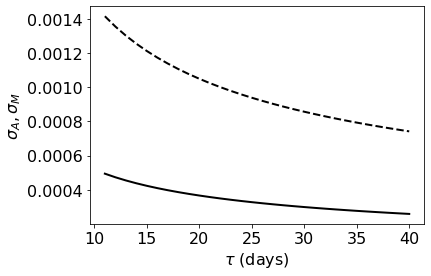

In [26]:
num = 31
taur = np.linspace(10,40,num)
#print(decay,num)
tday1 = 3600*24
muar = np.zeros(num)
smar = np.zeros(num)
saar = np.zeros(num)

for j in range(1,num):
    muar[j] = -1/(taur[j]*tday1)
    mu1 = muar[j]
    alp1 = M3**2 + 4*(M2**3)
    bet1 = 8*mu1*(M2**3) + 2*mu1*(M3**2)
    gam1 = (M3**2)*(mu1**2)
    sm21 = (-bet1 + np.sqrt(bet1**2-4*alp1*gam1))/(2*alp1)
    sm1 = np.sqrt(sm21)
    sa1 = np.sqrt(-M2*(2*mu1 + sm1**2))
    smar[j] = sm1
    saar[j] = sa1
    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(taur[1:num],smar[1:num],lw = 2,color='black',linestyle='dashed') 
plt.plot(taur[1:num],saar[1:num],lw = 2,color='black')
plt.xlabel(r'$\tau$ (days)',fontsize=16)
plt.ylabel(r'$\sigma_A, \sigma_M$',fontsize=16,rotation=90)
plt.savefig('../paper/figs/sigma_var.png',bbox_inches='tight')
plt.show
    